# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [2]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\Users\LEE\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [6]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 24s 0us/step


In [8]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [9]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [10]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [11]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [12]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [13]:
y_label_test[:10]

array([[49],
       [33],
       [72],
       [51],
       [71],
       [92],
       [15],
       [14],
       [23],
       [ 0]])

In [26]:
#針對物件圖像數據集的類別編列成字典
k=list(np.arange(100))
v=['class_'+str(i) for i in k]

label_dict=dict(zip(k,v))
print(label_dict)


{0: 'class_0', 1: 'class_1', 2: 'class_2', 3: 'class_3', 4: 'class_4', 5: 'class_5', 6: 'class_6', 7: 'class_7', 8: 'class_8', 9: 'class_9', 10: 'class_10', 11: 'class_11', 12: 'class_12', 13: 'class_13', 14: 'class_14', 15: 'class_15', 16: 'class_16', 17: 'class_17', 18: 'class_18', 19: 'class_19', 20: 'class_20', 21: 'class_21', 22: 'class_22', 23: 'class_23', 24: 'class_24', 25: 'class_25', 26: 'class_26', 27: 'class_27', 28: 'class_28', 29: 'class_29', 30: 'class_30', 31: 'class_31', 32: 'class_32', 33: 'class_33', 34: 'class_34', 35: 'class_35', 36: 'class_36', 37: 'class_37', 38: 'class_38', 39: 'class_39', 40: 'class_40', 41: 'class_41', 42: 'class_42', 43: 'class_43', 44: 'class_44', 45: 'class_45', 46: 'class_46', 47: 'class_47', 48: 'class_48', 49: 'class_49', 50: 'class_50', 51: 'class_51', 52: 'class_52', 53: 'class_53', 54: 'class_54', 55: 'class_55', 56: 'class_56', 57: 'class_57', 58: 'class_58', 59: 'class_59', 60: 'class_60', 61: 'class_61', 62: 'class_62', 63: 'class_

In [27]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

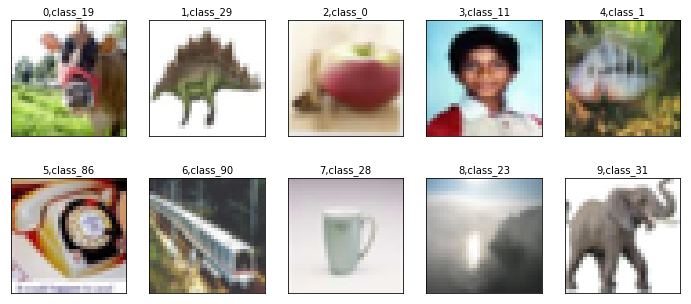

In [28]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [29]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [30]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [31]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [32]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [33]:
y_label_train.shape

(50000, 1)

In [34]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [35]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [36]:
y_label_train_OneHot.shape

(50000, 100)

In [37]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [41]:
#test mske dict 
{ i : 'item'+str(i) for i in range(10) }

{0: 'item0',
 1: 'item1',
 2: 'item2',
 3: 'item3',
 4: 'item4',
 5: 'item5',
 6: 'item6',
 7: 'item7',
 8: 'item8',
 9: 'item9'}